In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

Sampling from an arbitrary probability distribution $f(x)$ with domain $(a, b)$ and range $(c,d)$ is done in 4 steps:

1) Obtain a uniformly distributed, random number $x'$ from within your domain $(a, b)$.

2) Calculate $f(x')$. 

3) Obtain a second uniformly distributed, random number $f_{test}$ within the range $(c, d)$, i.e. between the minimum and maximum values of $f(x)$.

4) If $f_{test} < f(x')$, your sample value $=x'$. 
   Else, repeat 1-4)
   
   
In a sense, the above can be thought of as restricting a 'dice-roll'; by using the above algorithm, the function $f(x)$ is directly affecting the probability that a sample value 'lands' in an acceptance region determined by $f$.

NB: In the above, no domains or ranges were explicitly limited. In theory, one doesn't even need to restrict the sampling range for $f_{test}$ as the algorithm deals with 'relative' liklihoods between $x$ values.

Moreover, the function $f(x)$ need not be normalised to 1.

However, in practice, it is by far easier to normalise $f(x)$ such that the range $(c, d) = (0, 1]$. This way, $f_{test}$ can be sampled from a uniform distribution $(0, 1]$ unarbitrarily, and thus the algorithm is optimised to minimise the number repeats required before a 'hit' is made.

Below, I demonstrate a verbose way of implementing this arbitrary sampling:

first define the function

In [3]:
def Arbitrary_func(x):
    """Below one can write an arbitrary function. Ensuring the function is normalised with f range = (0, 1)
    will aid in the diceroll step after. Here I use a triangular distribution, normalised for domain x values of (0,1). 
    """
    
    return x

Below, is a demonstration of how to use a boolean condition to use the diceroll:

The only Numpy functions that need to be called (for purely the algorithm) are Numpy.random.uniform and Numpy.random.rand . Below Numpy.random is called as random 

In [10]:
domain = (0, 1) 

while True: #while test = True, a diceroll below is made
    x = np.random.uniform(domain[0], domain[1]) #Selects a uniformly random number within the sampling range
    y = Arbitrary_func(x) #Calculates the diceroll upper limit equal to the f(x)
    if random.rand() < y: #This statement checks if a random diceroll lies within the region restricted by upper limit
        break #Breaks loop, x is defined 
 #Repeats test until x is well defined
print(x)

0.44289155081452636


NB: The sampling region can be changed at will. Let's say you want to sample from the above distribution but limit the outputs to only between 0.1 and 0.2, this can be done

In [11]:
domain = (0.1, 0.2) #The edited region. 

while True: #while test = True, a diceroll below is made
    x = random.uniform(domain[0], domain[1]) #Selects a uniformly random number within the sampling range
    y = Arbitrary_func(x) #Calculates the diceroll upper limit equal to the f(x)
    if random.rand() < y: #This statement checks if a random diceroll lies within the region restricted by upper limit
        break #Breaks loop, x is defined 
 #Repeats test until x is well defined
print(x)

0.1145342501615848


NB: In the above, the sampling domain was changed without changing the uniform diceroll bounds. In pricipal this is fine, but for repeated dicerolls, performance is optimised by restricting the diceroll $f_{test}$ range to match the sampling distribution's, $f(x)'s$, range. This minimises the region which $f_{test}$ makes unavailable. In numpy, this is equivilent to changing random.rand() to random.uniform() with new upper, lower limits based on the Arbitrary_fun() range.

In [16]:
domain = (0.1, 0.2) #The edited region. 

while True: #while test = True, a diceroll below is made
    x = random.uniform(domain[0], domain[1]) #Selects a uniformly random number within the sampling range
    y = Arbitrary_func(x) #Calculates the diceroll upper limit equal to the f(x)
    if random.uniform( Arbitrary_func(domain[0]), Arbitrary_func(domain[1]) ) < y: #This statement checks if a random diceroll lies within the region restricted by upper limit
        break #Breaks loop, x is defined 
        
print(x)

0.1781219593510956


However, the best way to optimise the algorithm is to ensure that Arbitrary_func() is defined such that its range is normalised to 1 for the domain that you wish to work with - not the area. In a sense this makes the functions more similar to probability functions $P(x)$ than to probability density functions $f(x) \delta x$.

Below, I show how the example can be used in a repeat to yield a Monte Carlo simulation of triangularly distributed data.

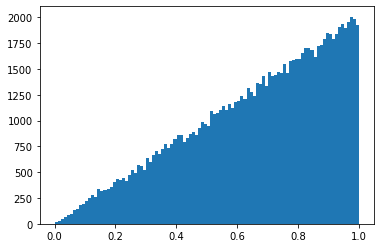

In [17]:

domain = (0, 1)

sample = np.empty(100000) #Create an array to be populated by the Arbitrary_func distributed values

for i in range(len(sample)): #populate the array using the same method, just on repeat

    while True:
        x = random.uniform(domain[0], domain[1])
        y = Arbitrary_func(x)
    #while test == True:
        if random.rand() < y:
            break
    sample[i] = x

plt.figure #plotting the histogram of data
plt.hist(sample, bins=100)
plt.show()

The implementation the writer elected to use in a blackbody simulation is below.

In [14]:
def blackbody_diceroll(lowerwav = 1e-9, upperwav = 3e-6, T=5000.):
    """Samples a random number based on a blackbody distribution of temperature
    T.
    ---
    Parameters:
    upperwav (opt.): Float. Limits minimum wavelength return value. Default
    to 1 nm
    lowerwav (opt): Float. Limits maximum wavelength return value. Default
    to 3 micro-m
    T: Float. Blackbody temperature. Default to 5000 K
    ---
    Returns:
    wav: Float. A blackbody distributed random wavelength
    """
    peakwav = 2.898e-3/T # The peak wavelength given by Wein's law is calculated to normalise the blackbody 'intesity' below
    
    h = 6.626e-34
    c = 3e8
    k = 1.38e-23
    a = 2.0*h*c**2 #Define physical and intemediate variables for use in blackbody distribution
    
    bpeak = h*c/(peakwav*k*T)   #Defines an intemediate variable for the maximum intensity
    max_intensity = a/ ( (peakwav**5) * (np.exp(bpeak) - 1.0) ) #Calculates a normalisation factor for the blackbody
                                                                  #distribution such that maximum = 1.
    
    while True:
        wav = random.uniform(lowerwav, upperwav) #Selects a random wavelength within desired range
        b = h*c/(wav*k*T) #intemediate variable for intensity at the randomly selected wavelength
        
        intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) ) #Calculates blackbody intensity
        normed_intensity = intensity / max_intensity #Normalises the intensity|-> Thus gives the diceroll upper limit = f(x)
        
        if random.rand() < normed_intensity: #Conducts a diceroll and checks if it lies within region restricted by f(x)
            break

    return wav #Returns a uniformly distributed random wavelength

C:\Users\Oem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


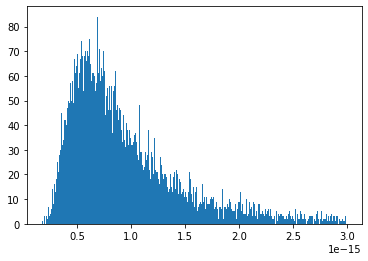

C:\Users\Oem\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


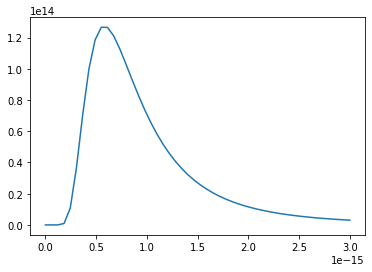

In [15]:
sample = np.zeros(10000)  #Builds an empty data array
for i in range(len(sample)): #Populates array with blackbody distributed data
    sample[i] = blackbody_diceroll()


plt.figure()
plt.hist(sample*1e-9, bins=500) #prints histogram
plt.show()

plt.figure()
x = np.linspace(1e-9, 3e-6) #prints plot with theoretical distribution
peakwav = 2.89e-3/5000
h = 6.626e-34
c = 3e8
k = 1.38e-23
a = 20*h*c**2
b = h*c/(x*k*5000)

plt.plot(x*1e-9, a/ ( (x**5) * (np.exp(b) - 1.0) ))
plt.show()

Due to the nature of the algorithm, the above can be simplified slightly. Notice in the above that some intemediate variables are defined for use in a physical blackbody distribution. Also notice that the variable 'a' simply scales the 'max_intensity' and 'intensity' functions by the same amount. Thus a 'normed_intensity' can still be acheived by simply ommiting the enlargement factor 'a'.

In [ ]:
def blackbody_diceroll(upperwav = 1e-9, lowerwav = 3e-6, T=5000.):
    """Samples a random number based on a blackbody distribution of temperature
    T.
    ---
    Parameters:
    upperwav (opt.): Float. Limits minimum wavelength return value. Default
    to 1 nm
    lowerwav (opt): Float. Limits maximum wavelength return value. Default
    to 3 micro-m
    T: Float. Blackbody temperature. Default to 5000 K
    ---
    Returns:
    wav: Float. A blackbody distributed random wavelength
    """
    peakwav = 2.898e-3/T # The peak wavelength given by Wein's law is calculated to normalise the blackbody 'intesity' below
    
    h = 6.626e-34
    c = 3e8
    k = 1.38e-23
    #Omission a = 2.0*h*c**2 #Define physical and intemediate variables for use in blackbody distribution
    
    bpeak = h*c/(peakwav*k*T)   #Defines an intemediate variable for the maximum intensity
    max_intensity = 1/ ( (peakwav**5) * (np.exp(bpeak) - 1.0) ) #Calculates a normalisation factor for the blackbody
                                                                  #distribution such that maximum = 1.
    while True:
        wav = random.uniform(lowerwav, upperwav) #Selects a random wavelength within desired range
        b = h*c/(wav*k*T) #intemediate variable for intensity at the randomly selected wavelength
        
        intensity = 1/ ( (wav**5) * (np.exp(b) - 1.0) ) #Calculates blackbody intensity
        normed_intensity = intensity / max_intensity #Normalises the intensity|-> Thus gives the diceroll upper limit = f(x)
        
        if random.rand() < normed_intensity: #Conducts a diceroll and checks if it lies within region restricted by f(x)
            break
            
    return wav #Returns a uniformly distributed random wavelength

NB: Do note however, that intemediate variables that are not linear in wavelength cannot be ommited without changing the relative probabilities; i.e it must be $exp(\frac{hc}{\lambda T})$ not simply $exp(\frac{1}{\lambda T})$ 

In [ ]:
f(x) = np.tan(x)

In [18]:
%%timeit
sample = np.empty(100000)

1.4 µs ± 9.06 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%%timeit
sample = np.zeros(100000)

41.6 µs ± 629 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
